In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

Part 1: Data Preprocessing

1.Load the Dataset

In [ ]:
data = pd.read_csv("Netflix_Userbase.csv")

2.Handling missing values

In [ ]:
print(data.isnull().sum())

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


3.Encode Categorical Variables

In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['Monthly Revenue']=(data['Monthly Revenue']>10).astype(int)

4.Feature Selection

In [ ]:
X = data_dummies.drop(['Monthly Revenue','Age'], axis=1)
y = data_dummies['Monthly Revenue']

Part 2: Exploratory Data Analysis (EDA)

1. Descriptive Statistics


In [ ]:
print(X.describe())

          User ID  Subscription Type_Premium  Subscription Type_Standard  \
count  2500.00000                 2500.00000                 2500.000000   
mean   1250.50000                    0.29320                    0.307200   
std     721.83216                    0.45532                    0.461425   
min       1.00000                    0.00000                    0.000000   
25%     625.75000                    0.00000                    0.000000   
50%    1250.50000                    0.00000                    0.000000   
75%    1875.25000                    1.00000                    1.000000   
max    2500.00000                    1.00000                    1.000000   

       Join Date_01-05-23  Join Date_01-06-22  Join Date_01-07-22  \
count           2500.0000         2500.000000         2500.000000   
mean               0.0004            0.001200            0.007600   
std                0.0200            0.034627            0.086863   
min                0.0000            0.

2. Visualizations

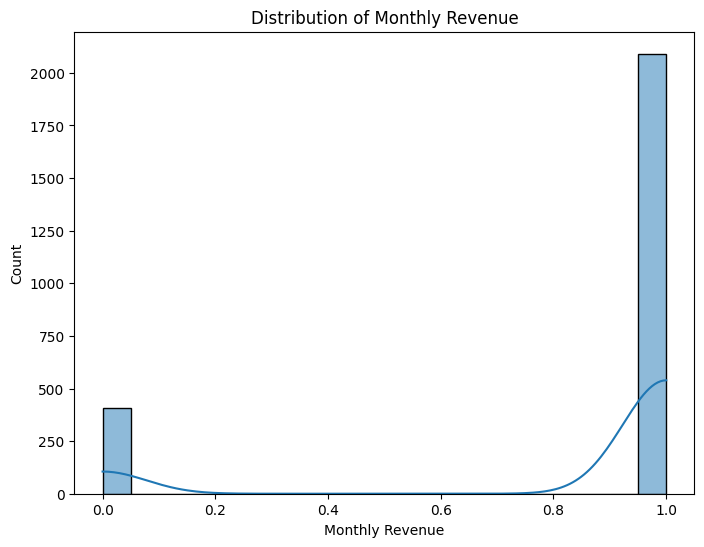

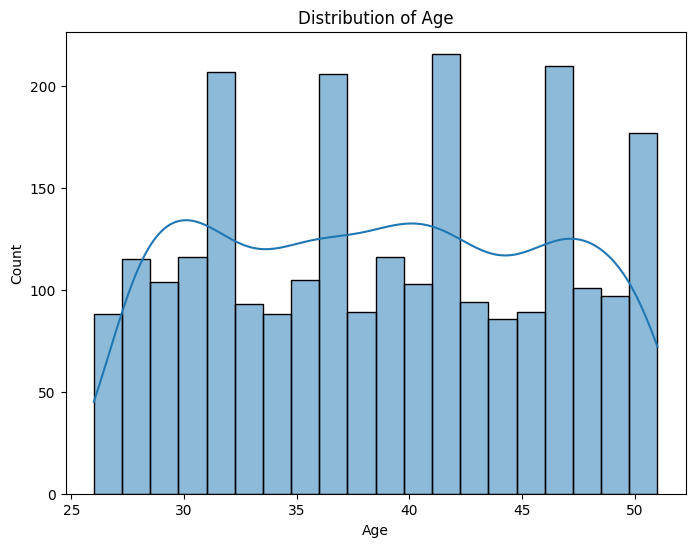

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data_dummies['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Part 3: Linear Regression Model (Predicting Monthly Revenue)



1.Build the Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

2.Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Linear Regression Model Evaluation:
Root Mean Squared Error (RMSE): 0.3998837643949078
R-squared (R2): -0.13328862527740704


Part 4: Logistic Regression Model (Predicting Customer Feedback)

1.Model Building

In [ ]:
data_dummies['Feedback'] = (data_dummies['Monthly Revenue'] > data_dummies['Monthly Revenue'].mean()).astype(int)

X_logistic = data_dummies.drop(['Monthly Revenue', 'Feedback'], axis=1)
y_logistic = data_dummies['Feedback']
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_logistic = logistic_model.predict(X_test_logistic)

2.Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic)
recall = recall_score(y_test_logistic, y_pred_logistic)
f1 = f1_score(y_test_logistic, y_pred_logistic)
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)

print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Logistic Regression Model Evaluation:
Accuracy: 0.83
Precision: 0.83
Recall: 1.0
F1 Score: 0.9071038251366119
Confusion Matrix:
[[  0  85]
 [  0 415]]


# **Part 5: Comparative Analysis and Visualization**


**Feature importance:** Feature importance analysis in both regression models reveals the variables that significantly impact the predicted outcomes. For instance, in a linear regression model studying Monthly Revenue, features with higher coefficients like subscription plan type and viewing frequency have a more substantial influence on revenue generation. Similarly, in a logistic regression model predicting customer feedback, features with larger coefficients or odds ratios such as user satisfaction ratings and content preferences can significantly affect feedback sentiment.

**Insights**:  Insights derived from the models' forecasts provide valuable information on the factors influencing Monthly Revenue and feedback. Predicting Monthly Revenue highlights the significance of factors like subscription plan types and user engagement levels. Active user engagement and premium subscription plans tend to have a more substantial impact on revenue generation. On the other hand, predictions regarding customer feedback reveal areas where Netflix excels or needs improvement, such as content quality and user experience. By pinpointing these areas, Netflix can refine its strategies to enhance customer satisfaction, thereby boosting loyalty and revenue in the competitive streaming industry. Leveraging analytics enables Netflix to make data-driven decisions, improving its offerings and services to meet customer expectations effectively.